In [3]:
import pandas as pd
import numpy as np
import datetime

In [70]:
import warnings

In [71]:
warnings.filterwarnings(action='ignore')

In [6]:
df = pd.read_csv("seoul_coffee_ver06.csv", encoding='cp949')
df

,인허가일자,영업상태코드,폐업일자,소재지면적,지번주소,사업장명,업태구분명,long,lat,franchise
0,20200713,1,0.0,329.89,서울특별시 송파구 방이동 44-3 현대토픽스,스타벅스 몽촌토성역점,커피숍,127.113106,37.516942,1.0
1,20200707,0,20200712.0,NaN,서울특별시 강남구 삼성동 159 코엑스,빈스빈스경기도미술관점(세븐스에비뉴),커피숍,127.058819,37.512521,1.0
2,20200714,1,0.0,107.78,서울특별시 서초구 양재동 273-2 1층,이디야 포이점,커피숍,127.044560,37.475653,0.0
3,20200714,1,0.0,367.62,서울특별시 중구 저동2가 88-5,투썸플레이스,커피숍,126.988639,37.564466,1.0
4,20200714,1,0.0,130.00,서울특별시 노원구 상계동 1118-38 한올빌딩,할리스커피 수락산역점,커피숍,127.054843,37.676224,1.0
...,...,...,...,...,...,...,...,...,...,...
47232,20100531,0,20180418.0,15.70,서울특별시송파구문정동516,카페 바쿠스,기타 휴게음식점,127.124998,37.477578,2.0
47233,20110624,0,20140414.0,33.20,서울특별시송파구문정동292,키즈카페 애플트리,기타 휴게음식점,127.119370,37.478232,2.0
47234,20110401,0,20200731.0,66.00,서울특별시송파구문정동516-0,카페 0 (young),기타 휴게음식점,127.120493,37.485106,2.0
47235,20190503,0,20200803.0,52.67,서울특별시용산구효창동13-2,카페 다(Cafe DA),기타 휴게음식점,126.963058,37.539195,2.0


## 폐업일자 0 으로 설정된 일자를 20211231 프로젝트 종료일자로 임의로 설정
- 향후 (폐업일-인허가일자)영업일 계산으로 분류를 하기위한 목적
- 2년 이상/이하를 기준으로 영업중인 카페와 폐업한 카페로 총 4 단계로 분류하기 위함.

In [7]:
for i in (df[df['폐업일자'] == 0]).index:
    df.loc[i, '폐업일자'] = 20211231
df

,인허가일자,영업상태코드,폐업일자,소재지면적,지번주소,사업장명,업태구분명,long,lat,franchise
0,20200713,1,20211231.0,329.89,서울특별시 송파구 방이동 44-3 현대토픽스,스타벅스 몽촌토성역점,커피숍,127.113106,37.516942,1.0
1,20200707,0,20200712.0,NaN,서울특별시 강남구 삼성동 159 코엑스,빈스빈스경기도미술관점(세븐스에비뉴),커피숍,127.058819,37.512521,1.0
2,20200714,1,20211231.0,107.78,서울특별시 서초구 양재동 273-2 1층,이디야 포이점,커피숍,127.044560,37.475653,0.0
3,20200714,1,20211231.0,367.62,서울특별시 중구 저동2가 88-5,투썸플레이스,커피숍,126.988639,37.564466,1.0
4,20200714,1,20211231.0,130.00,서울특별시 노원구 상계동 1118-38 한올빌딩,할리스커피 수락산역점,커피숍,127.054843,37.676224,1.0
...,...,...,...,...,...,...,...,...,...,...
47232,20100531,0,20180418.0,15.70,서울특별시송파구문정동516,카페 바쿠스,기타 휴게음식점,127.124998,37.477578,2.0
47233,20110624,0,20140414.0,33.20,서울특별시송파구문정동292,키즈카페 애플트리,기타 휴게음식점,127.119370,37.478232,2.0
47234,20110401,0,20200731.0,66.00,서울특별시송파구문정동516-0,카페 0 (young),기타 휴게음식점,127.120493,37.485106,2.0
47235,20190503,0,20200803.0,52.67,서울특별시용산구효창동13-2,카페 다(Cafe DA),기타 휴게음식점,126.963058,37.539195,2.0


In [8]:
df['폐업일자'] = df['폐업일자'].astype(int)

In [9]:
df1 = df.copy()

In [10]:
df1.drop(['소재지면적','지번주소','업태구분명'],  axis=1, inplace=True)
df1

,인허가일자,영업상태코드,폐업일자,사업장명,long,lat,franchise
0,20200713,1,20211231,스타벅스 몽촌토성역점,127.113106,37.516942,1.0
1,20200707,0,20200712,빈스빈스경기도미술관점(세븐스에비뉴),127.058819,37.512521,1.0
2,20200714,1,20211231,이디야 포이점,127.044560,37.475653,0.0
3,20200714,1,20211231,투썸플레이스,126.988639,37.564466,1.0
4,20200714,1,20211231,할리스커피 수락산역점,127.054843,37.676224,1.0
...,...,...,...,...,...,...,...
47232,20100531,0,20180418,카페 바쿠스,127.124998,37.477578,2.0
47233,20110624,0,20140414,키즈카페 애플트리,127.119370,37.478232,2.0
47234,20110401,0,20200731,카페 0 (young),127.120493,37.485106,2.0
47235,20190503,0,20200803,카페 다(Cafe DA),126.963058,37.539195,2.0


In [11]:
df1['폐업일자'].sort_values()

28301    11111111
37684    13300310
38008    18991230
40121    18991230
40884    18991230
           ...   
17918    20211231
17917    20211231
17916    20211231
17932    20211231
0        20211231
Name: 폐업일자, Length: 47237, dtype: int32

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47237 entries, 0 to 47236
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   인허가일자      47237 non-null  int64  
 1   영업상태코드     47237 non-null  int64  
 2   폐업일자       47237 non-null  int32  
 3   사업장명       47237 non-null  object 
 4   long       47237 non-null  float64
 5   lat        47237 non-null  float64
 6   franchise  47237 non-null  float64
dtypes: float64(3), int32(1), int64(2), object(1)
memory usage: 2.3+ MB


## 시계열에 표현할 1980년 이후의 데이터만 뽑아내고 이전 데이터는 삭제

In [13]:
df2 = df1[df1['인허가일자'] >= 19800000]
df2

,인허가일자,영업상태코드,폐업일자,사업장명,long,lat,franchise
0,20200713,1,20211231,스타벅스 몽촌토성역점,127.113106,37.516942,1.0
1,20200707,0,20200712,빈스빈스경기도미술관점(세븐스에비뉴),127.058819,37.512521,1.0
2,20200714,1,20211231,이디야 포이점,127.044560,37.475653,0.0
3,20200714,1,20211231,투썸플레이스,126.988639,37.564466,1.0
4,20200714,1,20211231,할리스커피 수락산역점,127.054843,37.676224,1.0
...,...,...,...,...,...,...,...
47232,20100531,0,20180418,카페 바쿠스,127.124998,37.477578,2.0
47233,20110624,0,20140414,키즈카페 애플트리,127.119370,37.478232,2.0
47234,20110401,0,20200731,카페 0 (young),127.120493,37.485106,2.0
47235,20190503,0,20200803,카페 다(Cafe DA),126.963058,37.539195,2.0


In [14]:
df2['폐업일자'].sort_values()

28301    11111111
37684    13300310
41127    18991230
38379    18991230
39877    18991230
           ...   
17587    20211231
17585    20211231
17584    20211231
17606    20211231
0        20211231
Name: 폐업일자, Length: 45786, dtype: int32

In [15]:
df3 = df2[df2['폐업일자'] >= 19800000]
df3

,인허가일자,영업상태코드,폐업일자,사업장명,long,lat,franchise
0,20200713,1,20211231,스타벅스 몽촌토성역점,127.113106,37.516942,1.0
1,20200707,0,20200712,빈스빈스경기도미술관점(세븐스에비뉴),127.058819,37.512521,1.0
2,20200714,1,20211231,이디야 포이점,127.044560,37.475653,0.0
3,20200714,1,20211231,투썸플레이스,126.988639,37.564466,1.0
4,20200714,1,20211231,할리스커피 수락산역점,127.054843,37.676224,1.0
...,...,...,...,...,...,...,...
47232,20100531,0,20180418,카페 바쿠스,127.124998,37.477578,2.0
47233,20110624,0,20140414,키즈카페 애플트리,127.119370,37.478232,2.0
47234,20110401,0,20200731,카페 0 (young),127.120493,37.485106,2.0
47235,20190503,0,20200803,카페 다(Cafe DA),126.963058,37.539195,2.0


## (인허가일자, 폐업일자) datetime 형태로 format 변경
- 그래프에 표현하기 위해 날짜 전처리 작업
- 필요하는 않은 컬럼에 대한 삭제

In [16]:
df3['인허가일자'] = pd.to_datetime(df3['인허가일자'], format='%Y%m%d')
df3['폐업일자'] = pd.to_datetime(df3['폐업일자'], format='%Y%m%d')
df3

,인허가일자,영업상태코드,폐업일자,사업장명,long,lat,franchise
0,2020-07-13,1,2021-12-31,스타벅스 몽촌토성역점,127.113106,37.516942,1.0
1,2020-07-07,0,2020-07-12,빈스빈스경기도미술관점(세븐스에비뉴),127.058819,37.512521,1.0
2,2020-07-14,1,2021-12-31,이디야 포이점,127.044560,37.475653,0.0
3,2020-07-14,1,2021-12-31,투썸플레이스,126.988639,37.564466,1.0
4,2020-07-14,1,2021-12-31,할리스커피 수락산역점,127.054843,37.676224,1.0
...,...,...,...,...,...,...,...
47232,2010-05-31,0,2018-04-18,카페 바쿠스,127.124998,37.477578,2.0
47233,2011-06-24,0,2014-04-14,키즈카페 애플트리,127.119370,37.478232,2.0
47234,2011-04-01,0,2020-07-31,카페 0 (young),127.120493,37.485106,2.0
47235,2019-05-03,0,2020-08-03,카페 다(Cafe DA),126.963058,37.539195,2.0


In [17]:
df3['in_month']=df3['인허가일자'].dt.month
df3['in_year']=df3['인허가일자'].dt.year
df3['out_month']=df3['폐업일자'].dt.month
df3['out_year']=df3['폐업일자'].dt.year
df3

,인허가일자,영업상태코드,폐업일자,사업장명,long,lat,franchise,in_month,in_year,out_month,out_year
0,2020-07-13,1,2021-12-31,스타벅스 몽촌토성역점,127.113106,37.516942,1.0,7,2020,12,2021
1,2020-07-07,0,2020-07-12,빈스빈스경기도미술관점(세븐스에비뉴),127.058819,37.512521,1.0,7,2020,7,2020
2,2020-07-14,1,2021-12-31,이디야 포이점,127.044560,37.475653,0.0,7,2020,12,2021
3,2020-07-14,1,2021-12-31,투썸플레이스,126.988639,37.564466,1.0,7,2020,12,2021
4,2020-07-14,1,2021-12-31,할리스커피 수락산역점,127.054843,37.676224,1.0,7,2020,12,2021
...,...,...,...,...,...,...,...,...,...,...,...
47232,2010-05-31,0,2018-04-18,카페 바쿠스,127.124998,37.477578,2.0,5,2010,4,2018
47233,2011-06-24,0,2014-04-14,키즈카페 애플트리,127.119370,37.478232,2.0,6,2011,4,2014
47234,2011-04-01,0,2020-07-31,카페 0 (young),127.120493,37.485106,2.0,4,2011,7,2020
47235,2019-05-03,0,2020-08-03,카페 다(Cafe DA),126.963058,37.539195,2.0,5,2019,8,2020


In [18]:
df3['in_count'] = 1
df3['out_count'] = 1
df3

,인허가일자,영업상태코드,폐업일자,사업장명,long,lat,franchise,in_month,in_year,out_month,out_year,in_count,out_count
0,2020-07-13,1,2021-12-31,스타벅스 몽촌토성역점,127.113106,37.516942,1.0,7,2020,12,2021,1,1
1,2020-07-07,0,2020-07-12,빈스빈스경기도미술관점(세븐스에비뉴),127.058819,37.512521,1.0,7,2020,7,2020,1,1
2,2020-07-14,1,2021-12-31,이디야 포이점,127.044560,37.475653,0.0,7,2020,12,2021,1,1
3,2020-07-14,1,2021-12-31,투썸플레이스,126.988639,37.564466,1.0,7,2020,12,2021,1,1
4,2020-07-14,1,2021-12-31,할리스커피 수락산역점,127.054843,37.676224,1.0,7,2020,12,2021,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47232,2010-05-31,0,2018-04-18,카페 바쿠스,127.124998,37.477578,2.0,5,2010,4,2018,1,1
47233,2011-06-24,0,2014-04-14,키즈카페 애플트리,127.119370,37.478232,2.0,6,2011,4,2014,1,1
47234,2011-04-01,0,2020-07-31,카페 0 (young),127.120493,37.485106,2.0,4,2011,7,2020,1,1
47235,2019-05-03,0,2020-08-03,카페 다(Cafe DA),126.963058,37.539195,2.0,5,2019,8,2020,1,1


In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45747 entries, 0 to 47236
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   인허가일자      45747 non-null  datetime64[ns]
 1   영업상태코드     45747 non-null  int64         
 2   폐업일자       45747 non-null  datetime64[ns]
 3   사업장명       45747 non-null  object        
 4   long       45747 non-null  float64       
 5   lat        45747 non-null  float64       
 6   franchise  45747 non-null  float64       
 7   in_month   45747 non-null  int64         
 8   in_year    45747 non-null  int64         
 9   out_month  45747 non-null  int64         
 10  out_year   45747 non-null  int64         
 11  in_count   45747 non-null  int64         
 12  out_count  45747 non-null  int64         
dtypes: datetime64[ns](2), float64(3), int64(7), object(1)
memory usage: 4.9+ MB


In [20]:
df3.drop(['인허가일자','영업상태코드','폐업일자','사업장명','long','lat','franchise'], axis=1, inplace=True)
df3

,in_month,in_year,out_month,out_year,in_count,out_count
0,7,2020,12,2021,1,1
1,7,2020,7,2020,1,1
2,7,2020,12,2021,1,1
3,7,2020,12,2021,1,1
4,7,2020,12,2021,1,1
...,...,...,...,...,...,...
47232,5,2010,4,2018,1,1
47233,6,2011,4,2014,1,1
47234,4,2011,7,2020,1,1
47235,5,2019,8,2020,1,1


In [21]:
df_in = df3.groupby(['in_year', 'in_month'])['in_count'].sum()
df_out = df3.groupby(['out_year', 'out_month'])['out_count'].sum()

In [22]:
df_in

in_year  in_month
1980     1            14
         2            14
         3            12
         4            26
         5            16
                    ... 
2021     8           256
         9           194
         10          225
         11          212
         12           45
Name: in_count, Length: 504, dtype: int64

In [23]:
df_out

out_year  out_month
1980      2                1
          6                1
          8                1
1981      4                1
          7                1
                       ...  
2021      8              139
          9              143
          10             167
          11             137
          12           15914
Name: out_count, Length: 433, dtype: int64

In [24]:
df4 = pd.DataFrame(df_in)
df5 = pd.DataFrame(df_out)
df = pd.concat([df4, df5], axis=1)
df

in_count  out_count
1980 1         14        NaN
     2         14        1.0
     3         12        NaN
     4         26        NaN
     5         16        NaN
...           ...        ...
2021 8        256      139.0
     9        194      143.0
     10       225      167.0
     11       212      137.0
     12        45    15914.0

[504 rows x 2 columns]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 504 entries, (1980, 1) to (2021, 12)
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   in_count   504 non-null    int64  
 1   out_count  433 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 10.7 KB


In [26]:
df.to_csv('seoul_coffee_time.csv', index=True, encoding='cp949')

In [27]:
df = pd.read_csv("seoul_coffee_time.csv", encoding='cp949')
df

,Unnamed: 0,Unnamed: 1,in_count,out_count
0,1980,1,14,NaN
1,1980,2,14,1.0
2,1980,3,12,NaN
3,1980,4,26,NaN
4,1980,5,16,NaN
...,...,...,...,...
499,2021,8,256,139.0
500,2021,9,194,143.0
501,2021,10,225,167.0
502,2021,11,212,137.0


In [28]:
df.rename(columns = {"Unnamed: 0": "year","Unnamed: 1": "month"}, inplace = True)
df

,year,month,in_count,out_count
0,1980,1,14,NaN
1,1980,2,14,1.0
2,1980,3,12,NaN
3,1980,4,26,NaN
4,1980,5,16,NaN
...,...,...,...,...
499,2021,8,256,139.0
500,2021,9,194,143.0
501,2021,10,225,167.0
502,2021,11,212,137.0


In [29]:
df['date']=df.year.apply(str) + '_'+ df.month.apply(str)
df

,year,month,in_count,out_count,date
0,1980,1,14,NaN,1980_1
1,1980,2,14,1.0,1980_2
2,1980,3,12,NaN,1980_3
3,1980,4,26,NaN,1980_4
4,1980,5,16,NaN,1980_5
...,...,...,...,...,...
499,2021,8,256,139.0,2021_8
500,2021,9,194,143.0,2021_9
501,2021,10,225,167.0,2021_10
502,2021,11,212,137.0,2021_11


In [30]:
df_index = df[df['date'] == '2021_12'].index
df_index

Int64Index([503], dtype='int64')

In [31]:
df = df.drop(index=df_index)
df

,year,month,in_count,out_count,date
0,1980,1,14,NaN,1980_1
1,1980,2,14,1.0,1980_2
2,1980,3,12,NaN,1980_3
3,1980,4,26,NaN,1980_4
4,1980,5,16,NaN,1980_5
...,...,...,...,...,...
498,2021,7,240,179.0,2021_7
499,2021,8,256,139.0,2021_8
500,2021,9,194,143.0,2021_9
501,2021,10,225,167.0,2021_10


## 월 단위로 오픈, 폐업 한 카페 수 그래프 그리기

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [33]:
plt.rcParams['font.family'] = 'Malgun Gothic'

### 오픈한 카페 수(월 단위)

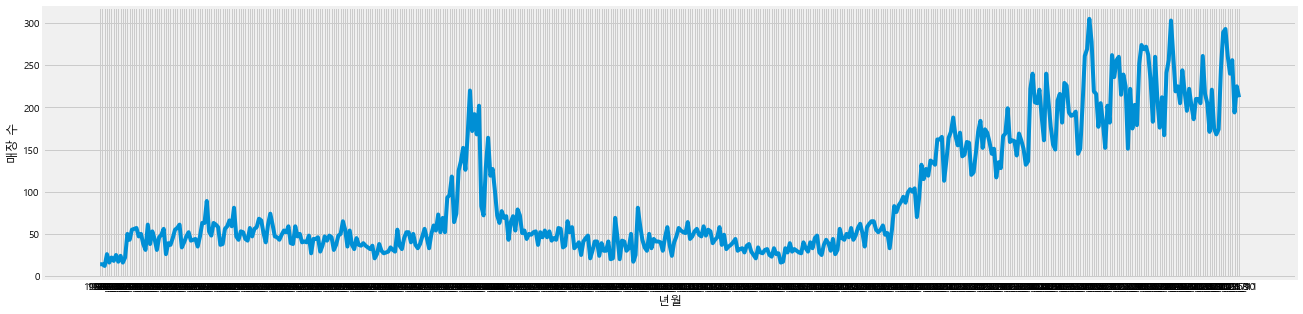

In [34]:
fig = plt.figure(figsize=(20,5))
plt.plot(df.date, df['in_count'])
plt.xlabel('년월')
plt.ylabel('매장 수')
plt.show()

### 폐업한 카페 수 (월 단위)

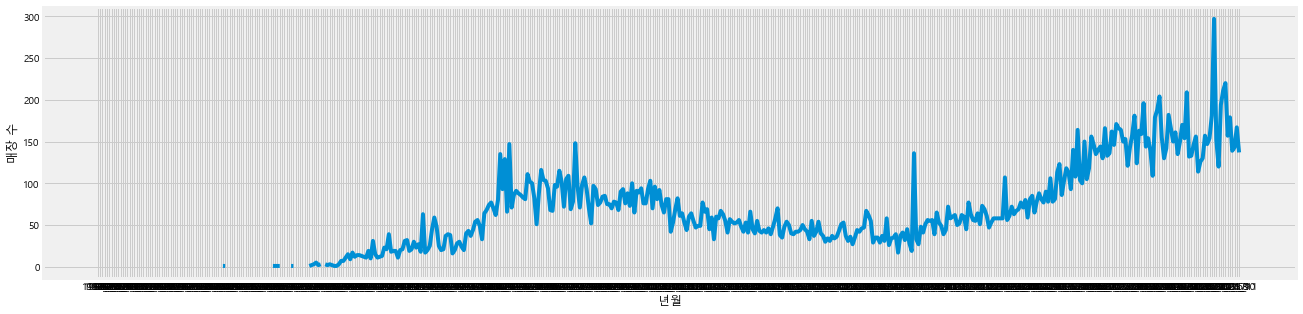

In [35]:
fig = plt.figure(figsize=(20,5))
plt.plot(df.date, df['out_count'])
plt.xlabel('년월')
plt.ylabel('매장 수')
plt.show()

In [36]:
df_in = df.groupby(['year'])['in_count'].sum()
df_out = df.groupby(['year'])['out_count'].sum()

In [37]:
df2 = pd.DataFrame(df_in)
df3 = pd.DataFrame(df_out)
df4 = pd.concat([df2, df3], axis=1)
df4

,in_count,out_count
year,,
1980,226,3.0
1981,579,2.0
1982,546,2.0
1983,599,2.0
1984,679,3.0
1985,633,2.0
1986,637,6.0
1987,517,9.0
1988,525,32.0


### 오픈한 카페 수 (년 단위)

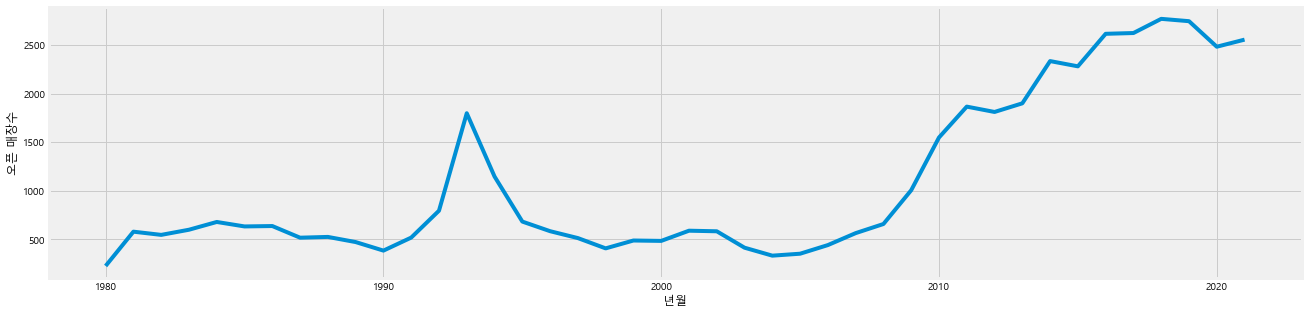

In [38]:
fig = plt.figure(figsize=(20,5))
plt.plot(df4.index, df4['in_count'])
plt.xlabel('년월')
plt.ylabel('오픈 매장수')
plt.show()

### 폐업한 카페 수 (년 단위)

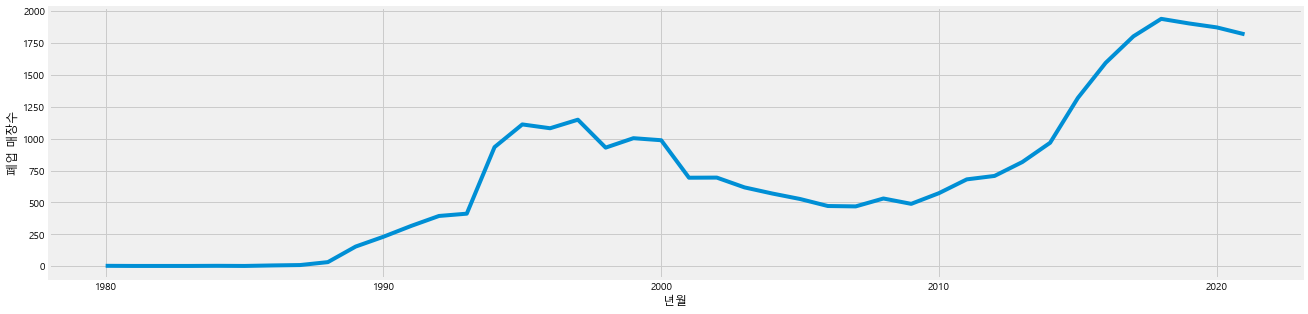

In [69]:
fig = plt.figure(figsize=(20,5))
plt.plot(df4.index, df4['out_count'])
plt.xlabel('년월')
plt.ylabel('폐업 매장수')
plt.show()

### 오픈/폐업한 매장수 (년 단위)

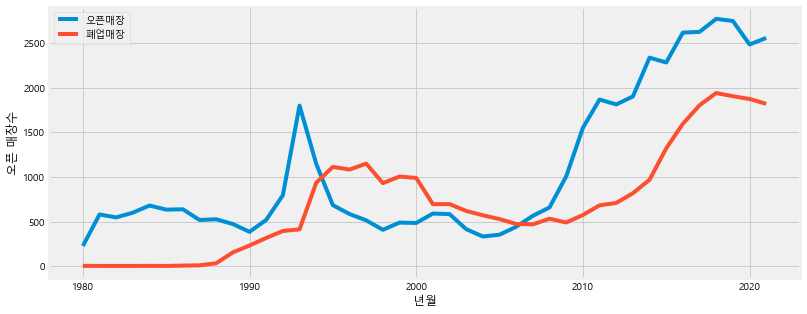

In [40]:
fig = plt.figure(figsize=(12,5))
plt.plot(df4.index, df4['in_count'])
plt.plot(df4.index, df4['out_count'])
plt.xlabel('년월')
plt.ylabel('오픈 매장수')
plt.legend(['오픈매장','폐업매장'])
plt.show()

## 향후 3년 카페 오픈/폐업에 대한 시계열 예측
- 데이터 전처리(년 단위/월 단위)

In [41]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 1980 to 2021
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   in_count   42 non-null     int64  
 1   out_count  42 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1008.0 bytes


In [42]:
df = df4.copy()
df.head()

,in_count,out_count
year,,
1980,226,3.0
1981,579,2.0
1982,546,2.0
1983,599,2.0
1984,679,3.0


In [43]:
df = df.reset_index()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       42 non-null     int64  
 1   in_count   42 non-null     int64  
 2   out_count  42 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.1 KB


In [45]:
df['month'] = 12
df['day'] = 31

In [46]:
df.head()

,year,in_count,out_count,month,day
0,1980,226,3.0,12,31
1,1981,579,2.0,12,31
2,1982,546,2.0,12,31
3,1983,599,2.0,12,31
4,1984,679,3.0,12,31


In [47]:
re_date = df[df['year'] == 2021]

In [48]:
re_date.month = 11
re_date.day = 30

In [49]:
df[df['year'] == 2021] = re_date
df

,year,in_count,out_count,month,day
0,1980,226,3.0,12,31
1,1981,579,2.0,12,31
2,1982,546,2.0,12,31
3,1983,599,2.0,12,31
4,1984,679,3.0,12,31
5,1985,633,2.0,12,31
6,1986,637,6.0,12,31
7,1987,517,9.0,12,31
8,1988,525,32.0,12,31
9,1989,472,154.0,12,31


In [50]:
cols = ['year','month','day']
df['date'] =df[cols].apply(lambda x: ''.join(x.values.astype(str)), axis=1)
df

,year,in_count,out_count,month,day,date
0,1980,226,3.0,12,31,19801231
1,1981,579,2.0,12,31,19811231
2,1982,546,2.0,12,31,19821231
3,1983,599,2.0,12,31,19831231
4,1984,679,3.0,12,31,19841231
5,1985,633,2.0,12,31,19851231
6,1986,637,6.0,12,31,19861231
7,1987,517,9.0,12,31,19871231
8,1988,525,32.0,12,31,19881231
9,1989,472,154.0,12,31,19891231


In [51]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df

,year,in_count,out_count,month,day,date
0,1980,226,3.0,12,31,1980-12-31
1,1981,579,2.0,12,31,1981-12-31
2,1982,546,2.0,12,31,1982-12-31
3,1983,599,2.0,12,31,1983-12-31
4,1984,679,3.0,12,31,1984-12-31
5,1985,633,2.0,12,31,1985-12-31
6,1986,637,6.0,12,31,1986-12-31
7,1987,517,9.0,12,31,1987-12-31
8,1988,525,32.0,12,31,1988-12-31
9,1989,472,154.0,12,31,1989-12-31


In [52]:
df.drop(['year','month','day'], axis=1, inplace=True)

In [53]:
df_in = df.copy()
df_out = df.copy()

In [54]:
df_in.drop(['out_count'], axis=1, inplace=True)
df_out.drop(['in_count'], axis=1, inplace=True)

In [55]:
df_in = df_in.set_index(['date'])
df_out = df_out.set_index(['date'])

In [115]:
# df_in.plot_diagnostics(fig_size=(16,10))

<AxesSubplot:xlabel='date'>

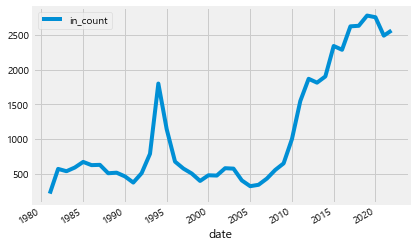

In [56]:
df_in.plot()

### 오픈매장수 예측 (년 단위)

In [57]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import itertools

In [114]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and d triplets
seasonal_pdq = [ (x[0], x[1], x[2], 12)  for x in pdq ]

print('Example of parameter combinations for Seasonal ARIMA ...')
print('SARIMAX:  {} x {}'.format(pdq[1], seasonal_pdq[1]) )
print('SARIMAX:  {} x {}'.format(pdq[1], seasonal_pdq[2]) )
print('SARIMAX:  {} x {}'.format(pdq[2], seasonal_pdq[3]) )
print('SARIMAX:  {} x {}'.format(pdq[2], seasonal_pdq[4]) )

Example of parameter combinations for Seasonal ARIMA ...
SARIMAX:  (0, 0, 1) x (0, 0, 1, 12)
SARIMAX:  (0, 0, 1) x (0, 1, 0, 12)
SARIMAX:  (0, 1, 0) x (0, 1, 1, 12)
SARIMAX:  (0, 1, 0) x (1, 0, 0, 12)


In [85]:
select_candi = 10000000
param_candi = ( 0, 0, 0 )
param_seasonal_candi = ( 0, 0, 0)

count=0
end_count = len(pdq)

for param in pdq:   
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX( df_in['in_count'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False
                                           )
            results = mod.fit()
            count += 1
            if count <= 5:
                print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            if results.aic < select_candi:
                select_candi = results.aic
                param_candi = param
                param_seasonal_candi = param_seasonal
        except:
            continue
            
print(param_candi, param_seasonal_candi, select_candi)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:711.420931539067
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1325.7060302507016
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:497.4598330118606
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:301.81547407127545
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:512.0845407915455
(1, 1, 1) (0, 1, 1, 12) 214.86970848975565


In [89]:
mod = sm.tsa.statespace.SARIMAX(
    df_in['in_count'],
    order=(1, 1, 1),
    seasonal_order=(0, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = mod.fit()

print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           in_count   No. Observations:                   42
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -103.435
Date:                            Fri, 24 Dec 2021   AIC                            214.870
Time:                                    11:26:12   BIC                            217.702
Sample:                                         0   HQIC                           214.840
                                             - 42                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5216      0.387      1.347      0.178      -0.237       1.280
ma.L1          0.1299      0.394   

In [91]:
# results.plot_diagnostics()
# results.plot_diagnostics(fig_size=(16,10))

### get_prediction(dynamic=False)

In [94]:
pred = results.get_prediction(
    start=pd.to_datetime('2015-12-31'),
    dynamic=False
)

pred_ci = pred.conf_int()

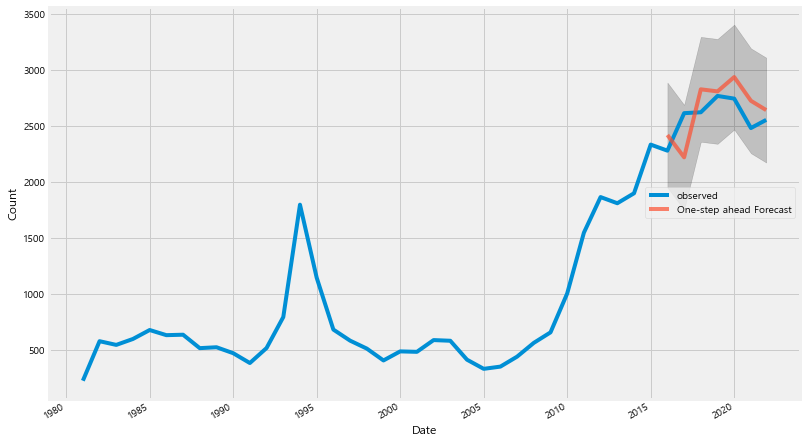

In [95]:
# 관측 데이터  1980년 부터 끝까지 
ax = df_in['in_count']['1980' : ].plot( label='observed', figsize=(12, 8) )

# 예측
pred.predicted_mean.plot(
    ax=ax,
    label='One-step ahead Forecast',
    alpha=.7
)

ax.fill_between(
    pred_ci.index,
    pred_ci['lower in_count'],
    pred_ci['upper in_count'],
    color='k',
    alpha=.2
)

ax.set_xlabel('Date')
ax.set_ylabel('Count')
plt.legend(loc=5)

plt.show()

### get_prediction(dynamic=True)

In [126]:
y_forecasted = pred.predicted_mean
y_truth = df_in['in_count']['1980-12-31' : ]

# Compute the Mean Square Error
mse = (( y_forecasted - y_truth ) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format( round(mse, 2) ) ) 

The Mean Squared Error of our forecasts is 767416.42


In [64]:
pred_dynamic = results.get_prediction(
    start=pd.to_datetime('2015-12-31'),
    dynamic=True,
    full_results=True
)

pred_dynamic_ci = pred_dynamic.conf_int()

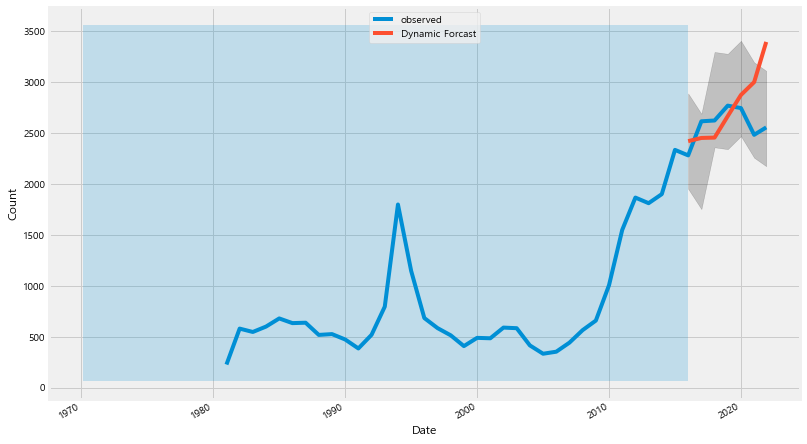

In [65]:
# 관측 데이터  1980년 부터 끝까지 
ax = df_in['in_count']['1980' : ].plot( label='observed', figsize=(12, 8) )

# 예측
pred_dynamic.predicted_mean.plot(
    ax=ax,
    label='Dynamic Forcast'
)

ax.fill_between(
    pred_ci.index,
    pred_ci['lower in_count'],
    pred_ci['upper in_count'],
    color='k',
    alpha=.2
)

ax.fill_betweenx(
    ax.get_ylim(),
    pd.to_datetime('2015-12-31'),
    df.index[-1],
    alpha=.2
)

ax.set_xlabel('Date')
ax.set_ylabel('Count')
plt.legend(loc=9)

plt.show()

### get_forecast(step=5)

In [128]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = df_in['in_count']['2021-11-30' : ]

# Compute the Mean Square Error
mse = (( y_forecasted - y_truth ) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format( round(mse, 2) ) ) 

The Mean Squared Error of our forecasts is 706127.23


In [137]:
# Get forecast some steps ahead in future
pred_uc = results.get_forecast(steps=5 )

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

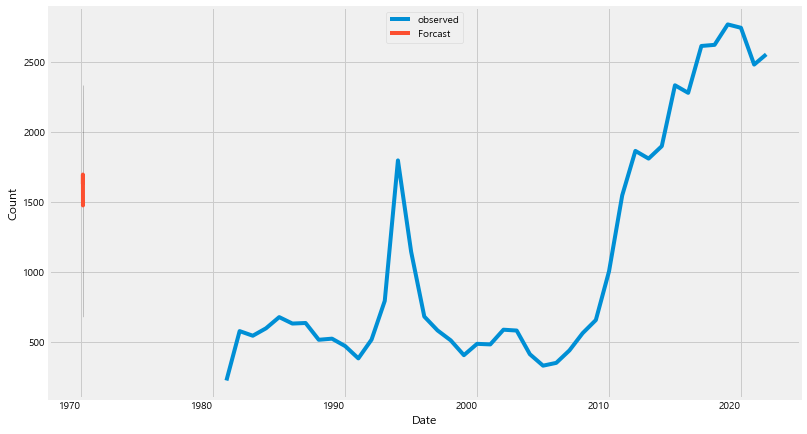

In [138]:
# 관측 데이터  1980년 부터 끝까지 
ax = df_in['in_count']['1980' : ].plot( label='observed', figsize=(12, 8) )

# 예측
pred_uc.predicted_mean.plot(
    ax=ax,
    label='Forcast'
)

ax.fill_between(
    pred_ci.index,
#     pred_ci['lower in_count'],
#     pred_ci['upper in_count'],
    pred_ci.iloc[ :, 0 ],
    pred_ci.iloc[ :, 1 ],
    color='k',
    alpha=.2
)


ax.set_xlabel('Date')
ax.set_ylabel('Count')
plt.legend(loc=9)

plt.show()

### 폐업 SARIMAX (년 단위)

In [117]:
select_candi = 10000000
param_candi = ( 0, 0, 0 )
param_seasonal_candi = ( 0, 0, 0)

count=0
end_count = len(pdq)

for param in pdq:   
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX( df_out['out_count'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=True,
                                            enforce_invertibility=True
                                           )
            results = mod.fit()
            count += 1
            if count <= 5:
                print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            if results.aic < select_candi:
                select_candi = results.aic
                param_candi = param
                param_seasonal_candi = param_seasonal
        except:
            continue
            
print(param_candi, param_seasonal_candi, select_candi)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:694.3874157603492
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:691.179761657701
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:490.93465236237415
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:490.84025213045544
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:685.7255423752355
(1, 1, 0) (1, 1, 0, 12) 383.46119394314974


In [119]:
mod = sm.tsa.statespace.SARIMAX(
    df_out['out_count'],
    order=(1, 1, 0),
    seasonal_order=(1, 1, 0, 12),
    enforce_stationarity=True,
    enforce_invertibility=True
)

results = mod.fit()

print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          out_count   No. Observations:                   42
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -188.731
Date:                            Fri, 24 Dec 2021   AIC                            383.461
Time:                                    11:49:22   BIC                            387.563
Sample:                                         0   HQIC                           384.746
                                             - 42                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3642      0.275      1.324      0.186      -0.175       0.904
ar.S.L12      -0.7851      0.081   

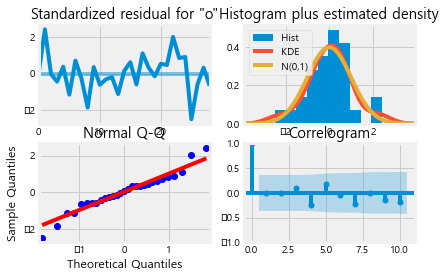

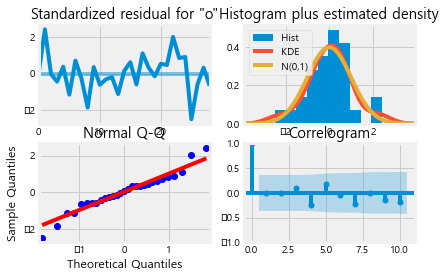

In [122]:
results.plot_diagnostics()
# results.plot_diagnostics(fig_size=(16,10))

### get_prediction(dynamic=False)

In [123]:
pred = results.get_prediction(
    start=pd.to_datetime('2015-12-31'),
    dynamic=False
)

pred_ci = pred.conf_int()

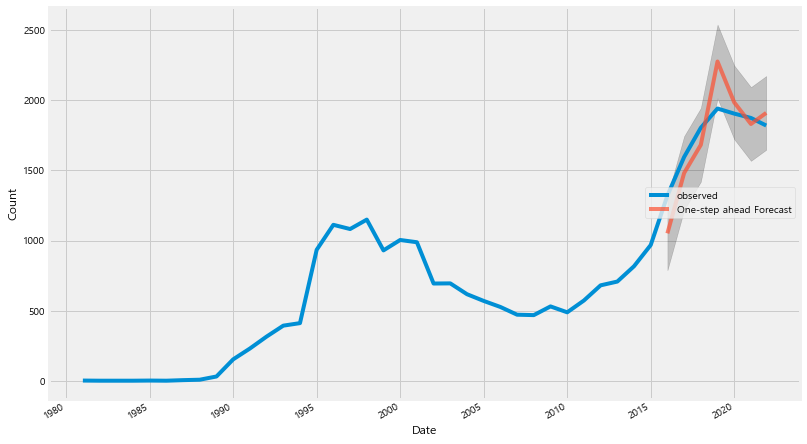

In [125]:
# 관측 데이터  1980년 부터 끝까지 
ax = df_out['out_count']['1980' : ].plot( label='observed', figsize=(12, 8) )

# 예측
pred.predicted_mean.plot(
    ax=ax,
    label='One-step ahead Forecast',
    alpha=.7
)

ax.fill_between(
    pred_ci.index,
    pred_ci['lower out_count'],
    pred_ci['upper out_count'],
    color='k',
    alpha=.2
)

ax.set_xlabel('Date')
ax.set_ylabel('Count')
plt.legend(loc=5)

plt.show()